In [3]:
from simpletransformers.ner import NERModel, NERArgs

In [4]:
special_labels = {',': 'I-COMMA',
                  '.': 'I-DOT',
                  '?': 'I-QMARK',
                  '!': 'I-EMARK',
                  ':': 'I-COLON',
                  ';': 'I-SEMICOLON'}
normal_label = 'O'
labels_set = list(special_labels.values()) + [normal_label]

In [5]:
model_args = NERArgs()
model_args.overwrite_output_dir = True
model_args.save_steps = -1
model = NERModel('bert',
                 './bert_models/6/checkpoint-13483-epoch-1/',
                 labels = labels_set,
                 args=model_args,
                 use_cuda=True)

In [6]:
import pandas as pd

testdf = pd.read_csv('./preprocessed_wikitext/test.csv').dropna()

In [7]:
result, model_outputs, predictions = model.eval_model(testdf)

  0%|          | 0/5 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/269 [00:00<?, ?it/s]

In [8]:
groups = [df for _, df in testdf.groupby('sentence_id')]

In [9]:
print(len(predictions) == len(groups))

True


In [10]:
trues = []
for i, sentence in enumerate(predictions):
  trues.append(groups[i]['labels'].to_list()[:len(sentence)])

In [11]:
print(len(trues), len(predictions))

2147 2147


In [12]:
import itertools
ps = list(itertools.chain.from_iterable(predictions))
ts = list(itertools.chain.from_iterable(trues))

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true=ts,y_pred=ps, labels=labels_set)
cm

array([[  4479,    650,      1,      0,    153,     14,   3541],
       [   164,   3980,      2,      0,     20,      1,   2385],
       [     0,      1,      4,      0,      0,      0,      1],
       [     0,      1,      0,      2,      0,      0,     13],
       [    19,     52,      0,      0,     93,      0,     91],
       [    57,    240,      0,      0,      2,     22,     72],
       [  1220,   1545,      0,      1,     60,      2, 148783]])

In [14]:
import numpy as np
summ = np.sum(cm, axis=1)
summ = np.expand_dims(summ, axis=1)

In [15]:
nor_cm = (cm/summ)
nor_cm

array([[5.06788866e-01, 7.35460511e-02, 1.13147771e-04, 0.00000000e+00,
        1.73116090e-02, 1.58406879e-03, 4.00656257e-01],
       [2.50305250e-02, 6.07448107e-01, 3.05250305e-04, 0.00000000e+00,
        3.05250305e-03, 1.52625153e-04, 3.64010989e-01],
       [0.00000000e+00, 1.66666667e-01, 6.66666667e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.66666667e-01],
       [0.00000000e+00, 6.25000000e-02, 0.00000000e+00, 1.25000000e-01,
        0.00000000e+00, 0.00000000e+00, 8.12500000e-01],
       [7.45098039e-02, 2.03921569e-01, 0.00000000e+00, 0.00000000e+00,
        3.64705882e-01, 0.00000000e+00, 3.56862745e-01],
       [1.45038168e-01, 6.10687023e-01, 0.00000000e+00, 0.00000000e+00,
        5.08905852e-03, 5.59796438e-02, 1.83206107e-01],
       [8.04690953e-03, 1.01905535e-02, 0.00000000e+00, 6.59582748e-06,
        3.95749649e-04, 1.31916550e-05, 9.81347000e-01]])

In [16]:
nor_cm.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1.])

In [17]:
from sklearn import metrics 
print(metrics.classification_report(ts, ps))

              precision    recall  f1-score   support

     I-COLON       0.28      0.36      0.32       255
     I-COMMA       0.75      0.51      0.61      8838
       I-DOT       0.62      0.61      0.61      6552
     I-EMARK       0.67      0.12      0.21        16
     I-QMARK       0.57      0.67      0.62         6
 I-SEMICOLON       0.56      0.06      0.10       393
           O       0.96      0.98      0.97    151611

    accuracy                           0.94    167671
   macro avg       0.63      0.47      0.49    167671
weighted avg       0.93      0.94      0.93    167671



Text(114.0, 0.5, 'True Label')

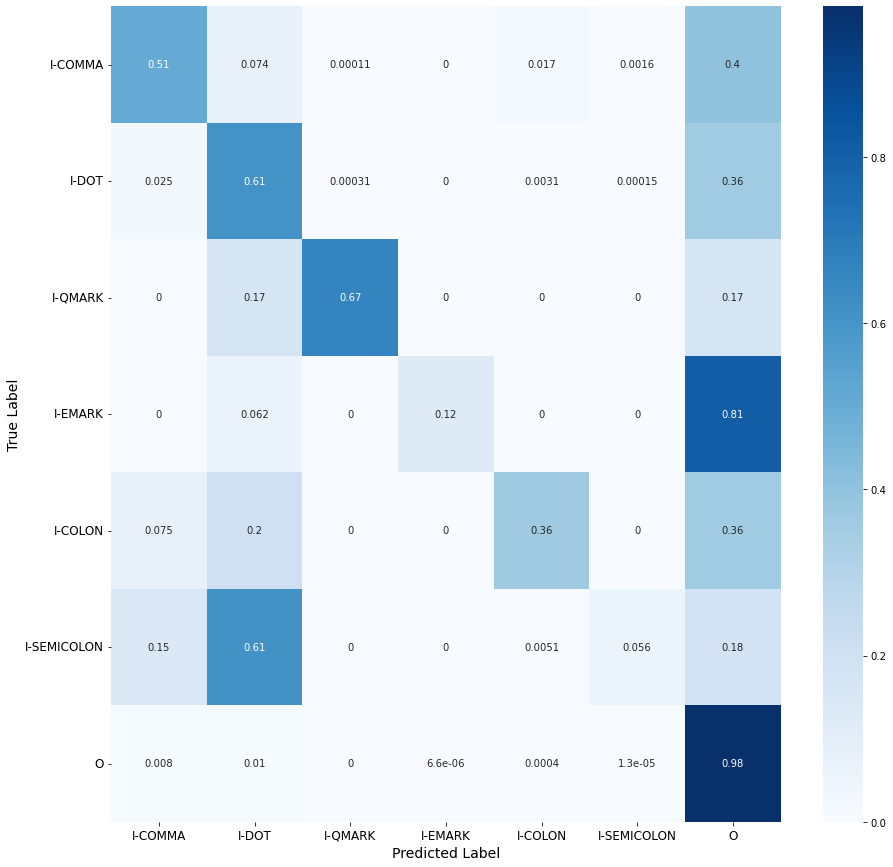

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plot_labels = labels_set
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(nor_cm,
            ax=ax, 
            annot=True,
            cmap='Blues',
            xticklabels=plot_labels,
            yticklabels=plot_labels)
plt.yticks(rotation=0,size=12)
plt.xticks(size=12)
ax.set_xlabel('Predicted Label',size=14)
ax.set_ylabel('True Label',size=14)